In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(10,7)

In [3]:
df=pd.read_csv('car_evaluation.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


all columns are categorical

In [5]:
# check for unique vales for each columns

In [6]:
for i in df.columns:
    print(i,'-',df[i].unique())

buying - ['vhigh' 'high' 'med' 'low']
maint - ['vhigh' 'high' 'med' 'low']
doors - ['2' '3' '4' '5more']
persons - ['2' '4' 'more']
lug_boot - ['small' 'med' 'big']
safety - ['low' 'med' 'high']
class - ['unacc' 'acc' 'vgood' 'good']


In [7]:
for i in df.columns:
    print(df[i].value_counts(),'\n')

med      432
vhigh    432
low      432
high     432
Name: buying, dtype: int64 

med      432
vhigh    432
low      432
high     432
Name: maint, dtype: int64 

5more    432
3        432
2        432
4        432
Name: doors, dtype: int64 

more    576
2       576
4       576
Name: persons, dtype: int64 

med      576
small    576
big      576
Name: lug_boot, dtype: int64 

med     576
low     576
high    576
Name: safety, dtype: int64 

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64 



In [8]:
# class count

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

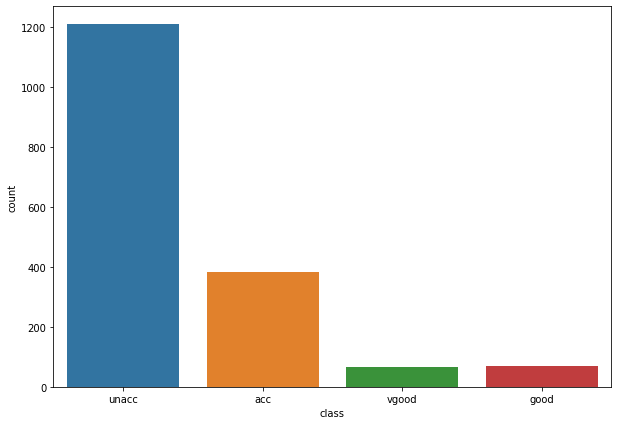

In [9]:
sns.countplot(df['class'])

In [10]:
# encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [12]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [13]:
# correlation matrix

<AxesSubplot:>

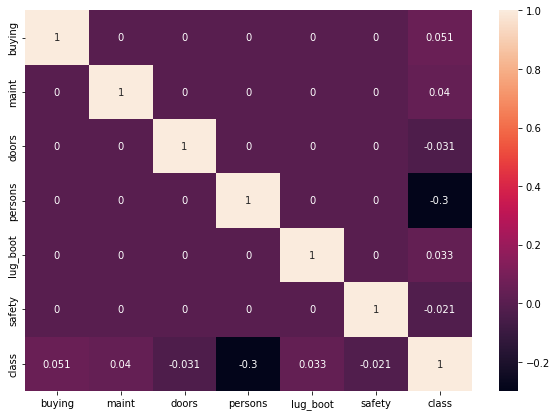

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
x=df.iloc[:,:-1].values
y=df['class'].values

In [16]:
x

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [17]:
y

array([2, 2, 2, ..., 2, 1, 3])

In [56]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [19]:
kfold=KFold(n_splits=10,shuffle=True,random_state=42)

In [20]:
# logistic regression

In [24]:
model_lr=LogisticRegression()
results=cross_val_score(model_lr,x,y,cv=kfold,scoring='accuracy')
print(results.mean())

0.6840065869068424


logistic regression model giving a low accuracy of 68%

In [22]:
# KNN

In [29]:
avg_score=[]
for i in range(2,30):
    model_knn=KNeighborsClassifier(n_neighbors=i)
    results=cross_val_score(model_knn,x,y,cv=kfold,scoring='accuracy')
    avg_score.append(results.mean())

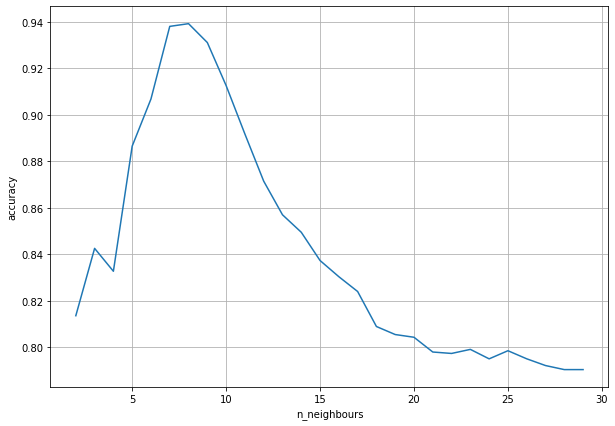

In [31]:
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
plt.grid()

knn model giving an accuracy of 94% with n_neighbours=8

In [32]:
# Random Forest Classifier

In [50]:
model_rfc=RandomForestClassifier()
results=cross_val_score(model_rfc,x,y,cv=kfold,scoring='accuracy')
results

array([0.95375723, 0.98843931, 0.98265896, 0.98265896, 0.98843931,
       0.97687861, 0.97687861, 0.99421965, 0.99418605, 0.97093023])

In [54]:
model_rfc=RandomForestClassifier()
results=cross_val_score(model_rfc,x,y,cv=kfold,scoring='accuracy')
print(results.mean())

0.9832201908858718


random forest classifier giving an accuracy of 98%

In [55]:
# xgboost

In [58]:
model_xgb=XGBClassifier()
results=cross_val_score(model_xgb,x,y,cv=kfold,scoring='accuracy')
print(results.mean())

0.9930568624815163


xgboost model giving an accuracy of 99%